In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('kanye_lyrics.csv', encoding = 'latin-1')

In [3]:
pd.options.display.max_colwidth = 5000

In [4]:
df.head()

,album,song,lyric,year
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear it. . Thas gon make them start jumpin up and down and sharin candy an' stuff. . Think you could probably do somethin for the kids for graduation to sing?.",2004
1,College Dropout,We Don't Care,". . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . If this is your first time hearing this . . You are about to experience something cold man. . We never had nothing handed took nothing for granted. . Took nothing from no man, man i'm my own man. . But as a shorty i looked up to the dopeman. . Only adult man i knew that wasnt a broke man. . Flickin starter coats man, Man you ount no man. . We don't care what people say. . This is for my niggas outside all winter. . Cuz this summer they aint finna to say next summer im finna. . Sittin in the hood like community colleges. . This dope money here is Lil Treys scholarship. . Cause aint no to tuition for havin no ambition. . And aint no loans for sittin your ass at home. . So we forced to sell crack rap and get a job. . You gotta do something man your ass is grown. . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . The second verse is for my dogs working 9 to 5. . That still hustle cause a nigga can't shine off $6.55. . And everybody selling make-up, Jacobs. . And bootleg tapes just to get they cake up. . We put shit on layaway then come back. . We claim other people kids on our income tax. . We take that money cop work than push packs to get paid. . And we don't care what people say. . Momma say she wanna move south . . Scratchin lottery tickets Eyes on a new house. . Around the same time Doe ran up in dudes house . . Couldnt get a job. . So since he couldnt get work he figured hed take work. . The drug game bolemic its hard to get weight. . So niggas money is homo its hard to get straight. . So we gon keep baking to the day we get cake.. . And we dont care what people say . . My Niggas . . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . You know the kids gonna act a fool. . When you stop the programs for after school. . And they DCFS them some of them dislecsic. . They favorite 50 Cent song's 12 Questions. . We scream, rock, blows, weed park . . so now we smart. . We aint retards the way teachers thought. . Hold up hold fast we make mo'cash. . Now tell my momma i belong in the slow class . . It's bad enough we on welfare. . You trying to put me on the school bus with the space for the wheel chair. . Im trying to get the car with the chromy wheels here. . You tryin to cut our lights like we dont live here. . Look at whats handed us our fatheres abandoned us. . When we get the hammers gone and call the ambulance. . Sometimes i feel no one in this world understands us. . But we dont care what people say. . My Niggas. . drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say.",2004
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won't slide

In [5]:
songs = df

In [6]:
len(songs)

141

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cbart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = stopwords.words('english')

In [11]:
stop_words.extend(['could', 'really', 'many', 'go', 'let', 'know', 'say', 'get', 'gon','things', 'thing', 'shit', 'ever', 'got', 'man', 'hey', 'uh', 'it', "it's", "like",'oh', 'gonna', 'yo', 'thing', 'huh', 'yeah', 'ya'])

In [12]:
vectorizer = TfidfVectorizer(stop_words =  stop_words, min_df = 0.1)

In [13]:
tfidf = vectorizer.fit_transform(songs['lyric'])

In [14]:
 from sklearn.decomposition import NMF

In [15]:
nmf = NMF(n_components = 6)

In [16]:
topic_values = nmf.fit_transform(tfidf)

In [17]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: feel good never god sky money people back want take
Topic #2: love away made never yeezy baby keep fly start see
Topic #3: right need baby tell one see stop ass turn lost
Topic #4: nigga niggas fuck bitch black real new hard us first
Topic #5: broke cars years remember black money kanye start car us
Topic #6: lights see life want time always baby turn mama tell


In [18]:
topic_labels = ['religion', 'love/women', 'heartbreak', 'partying', 'struggle', 'fame'] 

In [19]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics

,religion,love/women,heartbreak,partying,struggle,fame
0,0.058721,0.106358,0.009323,0.000000,0.023158,0.000000
1,0.264481,0.000000,0.000000,0.031631,0.041793,0.000000
2,0.126585,0.000000,0.129788,0.047748,0.008861,0.000000
3,0.121362,0.010139,0.029553,0.122324,0.009363,0.000000
4,0.001085,0.269869,0.000000,0.000000,0.000000,0.000000
5,0.174571,0.138154,0.032679,0.000000,0.009418,0.000000
6,0.155263,0.036109,0.050875,0.002144,0.000000,0.000000
7,0.170917,0.072589,0.089301,0.150037,0.000000,0.000000
8,0.143907,0.017872,0.072044,0.163866,0.000000,0.000000
9,0.004290,0.044027,0.059357,0.234723,0.000000,0.000000


In [20]:
songs = songs.join(df_topics)

In [21]:
songs.head()

,album,song,lyric,year,religion,love/women,heartbreak,partying,struggle,fame
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear it. . Thas gon make them start jumpin up and down and sharin candy an' stuff. . Think you could probably do somethin for the kids for graduation to sing?.",2004,0.058721,0.106358,0.009323,0.000000,0.023158,0.0
1,College Dropout,We Don't Care,". . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . If this is your first time hearing this . . You are about to experience something cold man. . We never had nothing handed took nothing for granted. . Took nothing from no man, man i'm my own man. . But as a shorty i looked up to the dopeman. . Only adult man i knew that wasnt a broke man. . Flickin starter coats man, Man you ount no man. . We don't care what people say. . This is for my niggas outside all winter. . Cuz this summer they aint finna to say next summer im finna. . Sittin in the hood like community colleges. . This dope money here is Lil Treys scholarship. . Cause aint no to tuition for havin no ambition. . And aint no loans for sittin your ass at home. . So we forced to sell crack rap and get a job. . You gotta do something man your ass is grown. . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . The second verse is for my dogs working 9 to 5. . That still hustle cause a nigga can't shine off $6.55. . And everybody selling make-up, Jacobs. . And bootleg tapes just to get they cake up. . We put shit on layaway then come back. . We claim other people kids on our income tax. . We take that money cop work than push packs to get paid. . And we don't care what people say. . Momma say she wanna move south . . Scratchin lottery tickets Eyes on a new house. . Around the same time Doe ran up in dudes house . . Couldnt get a job. . So since he couldnt get work he figured hed take work. . The drug game bolemic its hard to get weight. . So niggas money is homo its hard to get straight. . So we gon keep baking to the day we get cake.. . And we dont care what people say . . My Niggas . . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . You know the kids gonna act a fool. . When you stop the programs for after school. . And they DCFS them some of them dislecsic. . They favorite 50 Cent song's 12 Questions. . We scream, rock, blows, weed park . . so now we smart. . We aint retards the way teachers thought. . Hold up hold fast we make mo'cash. . Now tell my momma i belong in the slow class . . It's bad enough we on welfare. . You trying to put me on the school bus with the space for the wheel chair. . Im trying to get the car with the chromy wheels here. . You tryin to cut our lights like we dont live here. . Look at whats handed us our fatheres abandoned us. . When we get the hammers gone and call the ambulance. . Sometimes i feel no one in this world understands us. . But we dont care what people say. . My Niggas. . drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say.",2004,0.264481,0.000000,0.000000,0.031631,0.041793,0.0
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told y

In [22]:
songs.loc[songs['partying'] >= 0.1, 'partying'] = 1
songs.loc[songs['love/women'] >= 0.1, 'love/women'] = 1
songs.loc[songs['religion'] >= 0.1, 'religion'] = 1
songs.loc[songs['struggle'] >= 0.1, 'struggle'] = 1
songs.loc[songs['fame'] >= 0.1, 'fame'] = 1
songs.loc[songs['heartbreak'] >= 0.1, 'heartbreak'] = 1


In [23]:
songs.loc[songs['partying'] <= 0.1, 'partying'] = 0
songs.loc[songs['love/women'] <= 0.1, 'love/women'] = 0
songs.loc[songs['religion'] <= 0.1, 'religion'] = 0
songs.loc[songs['struggle'] <= 0.1, 'struggle'] = 0
songs.loc[songs['fame'] <= 0.1, 'fame'] = 0
songs.loc[songs['heartbreak'] <= 0.1, 'heartbreak'] = 0

In [24]:
songs.head()

album                                       song  \
1      College Dropout                              We Don't Care   
2      College Dropout                             Graduation Day   
3      College Dropout                             All Falls Down   
4      College Dropout                              I'll Fly Away   
5      College Dropout                                  Spaceship   
6      College Dropout                                Jesus Walks   
7      College Dropout                          Never Let Me Down   
8      College Dropout                                Get Em High   
9      College Dropout                               Workout Plan   
10     College Dropout                       The New Workout Plan   
11     College Dropout                                  Slow Jamz   
12     College Dropout                     Breathe In Breathe Out   
13     College Dropout                       School Spirit Skit 1   
14     College Dropout                              School Spirit   
15     College Dropout                       School Spirit Skit 2   
16     College Dropout                             Lil Jimmy Skit   
17     College Dropout                                  Two Words   
18     College Dropout                           Through The Wire   
19     College Dropout                            Family Business   
20     College Dropout                                  Last Call   
21   Late Registration                           Wake Up Mr. West   
22   Late Registration                              Heard 'Em Say   
23   Late Registration                              Touch The Sky   
24   Late Registration                                Gold Digger   
25   Late Registration                                    Skit #1   
26   Late Registration                                 Drive Slow   
27   Late Registration                                My Way Home   
28   Late Registration                                Crack Music   
29   Late Registration                                      Roses   
30   Late Registration                              Bring Me Down   
..                 ...                                        ...   
111             Yeezus                                   On Sight   
112             Yeezus                             Black Skinhead   
113             Yeezus                                 I Am A God   
114             Yeezus                                 New Slaves   
115             Yeezus                             Hold My Liquor   
116             Yeezus                                  I'm In It   
117             Yeezus                        Blood On The Leaves   
118             Yeezus                                 Guilt Trip   
119             Yeezus                                 Send It Up   
120             Yeezus                                    Bound 2   
121  The Life Of Pablo                            Ultralight Beam   
122  The Life Of Pablo              Father Stretch My Hands Pt. 1   
123  The Life Of Pablo              Father Stretch My Hands Pt. 2   
124  The Life Of Pablo                                     Famous   
125  The Life Of Pablo                                   Feedback   
126  The Life Of Pablo                                 Low Lights   
127  The Life Of Pablo                                 Highlights   
128  The Life Of Pablo                                Freestyle 4   
129  The Life Of Pablo                               I Love Kanye   
130  The Life Of Pablo                                      Waves   
131  The Life Of Pablo                                        FML   
132  The Life Of Pablo                               Real Friends   
133  The Life Of Pablo                                     Wolves   
134  The Life Of Pablo                              Frank's Track   
135  The Life Of Pablo  Siiiiiiiiilver Surffffeeeeer Intermission   
136  The Life Of Pablo                                   30 Hours   
137  The Life O

In [25]:
year_topics = songs.groupby('year').sum().reset_index()

In [26]:
year_topics

,year,religion,love/women,heartbreak,partying,struggle,fame
0,2004,15.0,3.0,5.0,5.0,0.0,0.0
1,2005,9.0,0.0,8.0,2.0,5.0,1.0
2,2007,11.0,0.0,4.0,1.0,0.0,3.0
3,2008,6.0,3.0,3.0,0.0,0.0,1.0
4,2010,7.0,5.0,4.0,7.0,1.0,2.0
5,2011,5.0,2.0,3.0,9.0,1.0,0.0
6,2012,4.0,4.0,6.0,5.0,0.0,1.0
7,2013,1.0,1.0,3.0,7.0,0.0,0.0
8,2016,8.0,5.0,6.0,7.0,1.0,2.0


In [27]:
import matplotlib.pyplot as plt

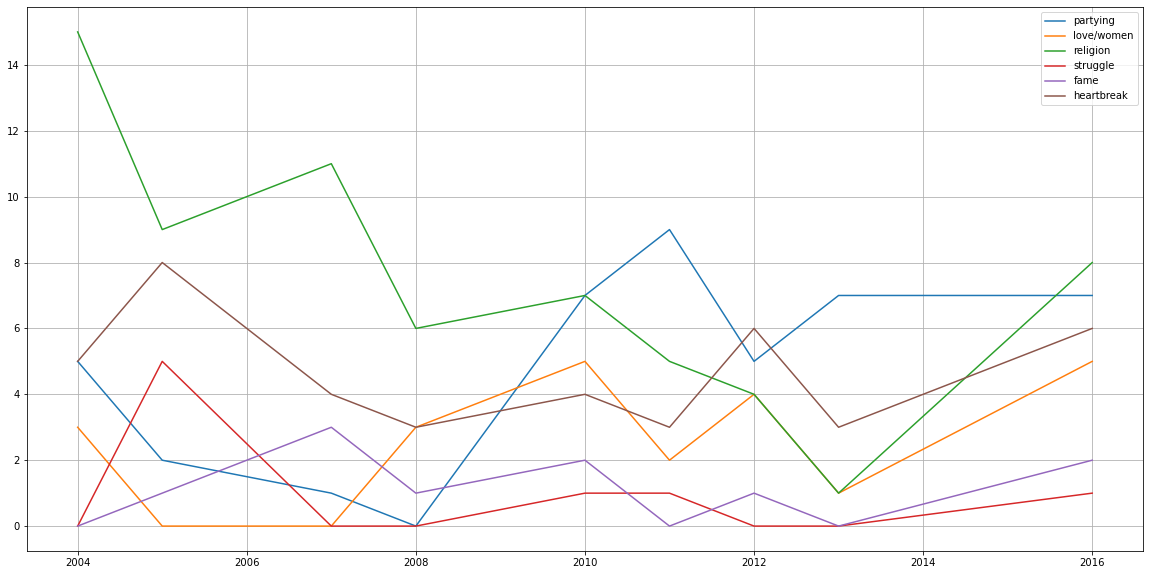

In [28]:
plt.figure(figsize = (20,10))
plt.plot(year_topics['year'], year_topics['partying'], label = 'partying' )
plt.plot(year_topics['year'], year_topics['love/women'], label = 'love/women' )
plt.plot(year_topics['year'], year_topics['religion'], label = 'religion' )
plt.plot(year_topics['year'], year_topics['struggle'], label = 'struggle' )
plt.plot(year_topics['year'], year_topics['fame'], label = 'fame' )
plt.plot(year_topics['year'], year_topics['heartbreak'], label = 'heartbreak' )
plt.grid()
plt.legend()